#사이킷런에 있는 다음의 kneighbors()를 numpy 모듈을 사용하여 함수로 작성하시오

사이킷런을 사용하지 않고 거리를 측정해서 가장 가까운 5개를 추출해서 찍어내기

In [2]:
# 도미 데이터
bream_length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0
  ]
bream_weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0
  ]

In [3]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import matplotlib.pyplot as plt

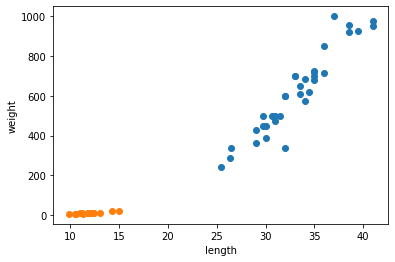

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14

In [7]:
import numpy as np

In [8]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [9]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[44  0 43 33  6 16 40 18 11 34  2 46 14 41 24 42 45  7 26 28 30 29 36 31
  1 22 20 21 35  3 48 15 10  8 27 39 32 47 23 25 38  9  5  4 13 19 12 37
 17]


In [10]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

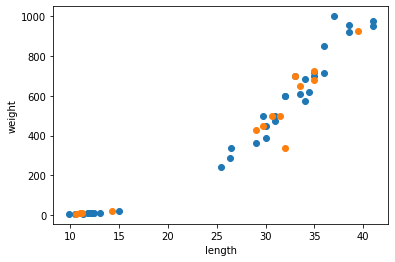

In [11]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
a = np.array([25,150])
a

array([ 25, 150])

두점사이의 거리를 재는 식을 함수로 만들고
numpy 배열 a를 거리와 train input의 i값으로 만든다
그 후 for문을 이용해 각 train input값마다 25,150의 거리를 잰다

In [13]:
def distance_calc(x1,y1,x2,y2):
  distance = (((x1-x2)**2+(y1-y2)**2)**1/2)
  return distance
dtype=[('distance',float),('index',int)]
a = np.empty((len(train_input)),dtype=dtype)
for i in range(len(train_input)):
  distance = distance_calc(train_input[i,0],train_input[i,1],25,150)
  a[i]=(distance,i)
  i += 1
np.set_printoptions(suppress=True)
a

array([(  9576.34 ,  0), (  4232.08 ,  1), (  9912.52 ,  2),
       (340440.5  ,  3), ( 61261.045,  4), (151282.   ,  5),
       ( 10076.69 ,  6), (105836.125,  7), ( 61268.   ,  8),
       (320128.   ,  9), ( 18051.125, 10), (  9566.42 , 11),
       (101274.5  , 12), (  9887.12 , 13), (151300.   , 14),
       (  9901.125, 15), (  9409.16 , 16), ( 28812.5  , 17),
       (162500.   , 18), (245060.5  , 19), (296541.125, 20),
       (361322.   , 21), ( 10258.25 , 22), (324103.625, 23),
       (  9800.845, 24), (110495.125, 25), ( 90353.   , 26),
       (143153.   , 27), ( 10382.965, 28), ( 22692.5  , 29),
       (  8513.005, 30), (101274.5  , 31), ( 52830.5  , 32),
       ( 45012.5  , 33), (159108.5  , 34)],
      dtype=[('distance', '<f8'), ('index', '<i8')])

그 후 거리가 짧은순으로 sort 한다

In [14]:
min_distance = np.sort(a,order='distance')
min_distance

array([(  4232.08 ,  1), (  8513.005, 30), (  9409.16 , 16),
       (  9566.42 , 11), (  9576.34 ,  0), (  9800.845, 24),
       (  9887.12 , 13), (  9901.125, 15), (  9912.52 ,  2),
       ( 10076.69 ,  6), ( 10258.25 , 22), ( 10382.965, 28),
       ( 18051.125, 10), ( 22692.5  , 29), ( 28812.5  , 17),
       ( 45012.5  , 33), ( 52830.5  , 32), ( 61261.045,  4),
       ( 61268.   ,  8), ( 90353.   , 26), (101274.5  , 12),
       (101274.5  , 31), (105836.125,  7), (110495.125, 25),
       (143153.   , 27), (151282.   ,  5), (151300.   , 14),
       (159108.5  , 34), (162500.   , 18), (245060.5  , 19),
       (296541.125, 20), (320128.   ,  9), (324103.625, 23),
       (340440.5  ,  3), (361322.   , 21)],
      dtype=[('distance', '<f8'), ('index', '<i8')])

5개의 점만을 이용할 것이니 슬라이싱을 해 5개의 점만을 추출한다
그리고 사실 거리는 sort할때만 사용하니 train input의 값을 가져와 배열을 만든다

In [31]:
for i in range(5):
  print(train_input[min_distance[i][1]])

[ 25.4 242. ]
[15.  19.9]
[12.4 13.4]
[13.  12.2]
[12.2 12.2]


In [50]:
indexes = np.empty(5)
for i in range(5):
  indexes[i] = min_distance[i][1]

indexes.astype(np.int64)

array([ 1, 30, 16, 11,  0])

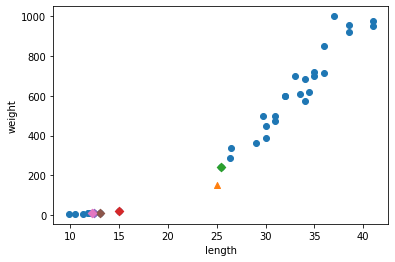

In [53]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
for i in range(5):
  plt.scatter(train_input[min_distance[i][1],0],train_input[min_distance[i][1],1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()